# Data Reconciliation example and some distributions for TEP4285

### imports 

In [1]:
import scipy.stats as sts #distributions
import numpy as np 
import matplotlib.pyplot as plt #plotting
from tqdm.notebook import tqdm #progress bar

#for residual plots:
import scipy.optimize as opt
from matplotlib.patches import PathPatch # for displaying a path
from matplotlib.path import Path # manually displaying a path


#### visualizing the twins distribution

In [2]:
life = np.linspace(15,60, 1000)

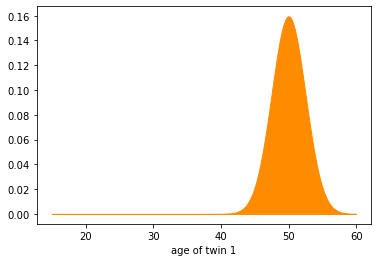

In [3]:
twin1 = sts.norm.pdf(life, loc = 50, scale = 2.5)
plt.figure()
plt.fill_between(life, twin1, [0 for i in range(1000)], color = 'darkorange')
#n, bins, patches = plt.hist(twin1, color = 'darkorange', bins = 'auto')
plt.xlabel('age of twin 1')
plt.show()

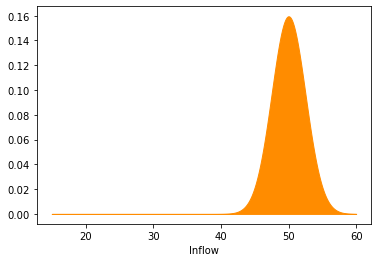

In [4]:
inflow = sts.norm.pdf(life, loc = 50, scale = 2.5)
plt.figure()
plt.fill_between(life, inflow, [0 for i in range(1000)], color = 'darkorange')
#n, bins, patches = plt.hist(twin1, color = 'darkorange', bins = 'auto')
plt.xlabel('Inflow')
plt.show()

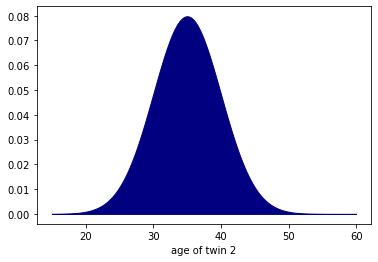

In [5]:
twin2 = sts.norm.pdf(life, loc = 35, scale = 5)
plt.figure()
plt.fill_between(life, twin2, [0 for i in range(1000)], color = 'navy')
plt.xlabel('age of twin 2')
plt.show()

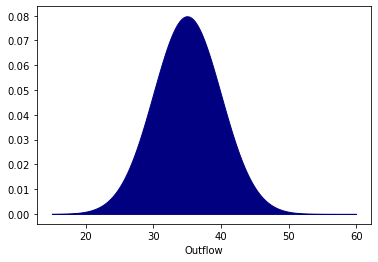

In [6]:
outflow = sts.norm.pdf(life, loc = 35, scale = 5)
plt.figure()
plt.fill_between(life, outflow, [0 for i in range(1000)], color = 'navy')
plt.xlabel('Outflow')
plt.show()

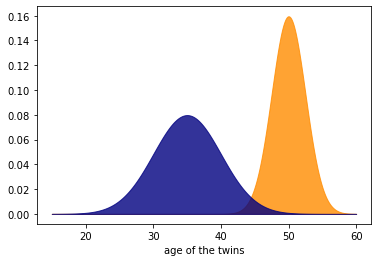

In [7]:
plt.figure()
plt.fill_between(life, twin1, [0 for i in range(1000)], color = 'darkorange', alpha = 0.8)
plt.fill_between(life, twin2, [0 for i in range(1000)], color = 'navy',alpha = 0.8)
plt.xlabel('age of the twins')
plt.show()

#### minimizing residuals - visualization

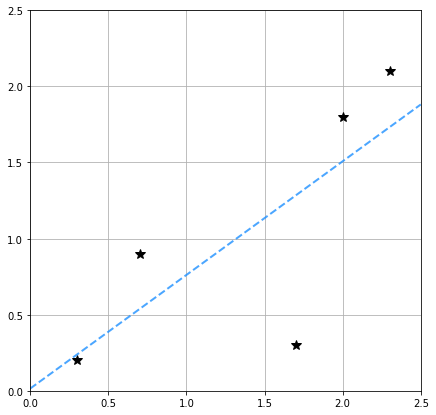

In [8]:
X = [0.3, 0.7, 1.7, 2, 2.3, ]
Y = [0.2, 0.9, 0.3, 1.8, 2.1]

x = np.linspace(0,2.5, 100)
#fit for squared residuals
a,b = np.polyfit(X,Y,1)

def plot_line_to_fit(x,y):
    # we know we will build the perpendicular line as y= mx+c, 
    # where we know m = -1/a. we find c from x,y:
    # y = -1/a * x + c => c = y- (-1/a*x)
    c = y + x/a
    #y* = mx* + c => into y* = a * x* + b
    # m * x* + c = a * x* + b
    # c-b = x* * (a-m)
    # (c-b)/(a-m)  = x*
    x_star = (c-b)/(a+1/a)
    y_star = a*x_star + b
    return [[x, x_star], [y, y_star]], np.sqrt((x-x_star)**2 + (y-y_star)**2)

def plot_points_set_limits():
    plt.plot(X, Y, '*',ms = 10, color = 'black')
    plt.plot(x, a*x+b, ls = '--', lw = 2, c = 'dodgerblue', alpha = 0.8)
    plt.xlim(0,2.5)
    plt.ylim(0,2.5)
    plt.grid('both')

plt.figure(figsize = (7,7))
plot_points_set_limits()
plt.show()

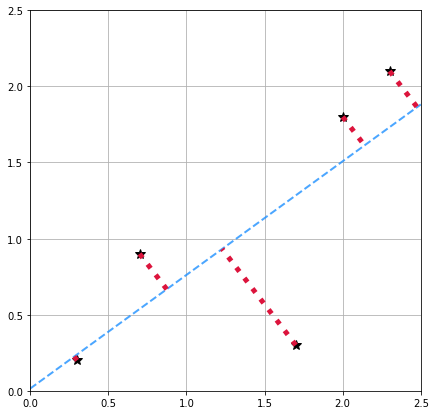

In [9]:
x = np.linspace(0,2.5, 100)
#fit for squared residuals
a,b = np.polyfit(X,Y,1)
plt.figure(figsize = (7,7))
plot_points_set_limits()

residuals = []
lines = []
for x, y in zip(X, Y):
    line, residual = plot_line_to_fit(x,y)
    plt.plot(line[0], line[1], c = 'crimson', ls = ':', lw = 5)
    lines.append(line)
    residuals.append(residual)

plt.show()

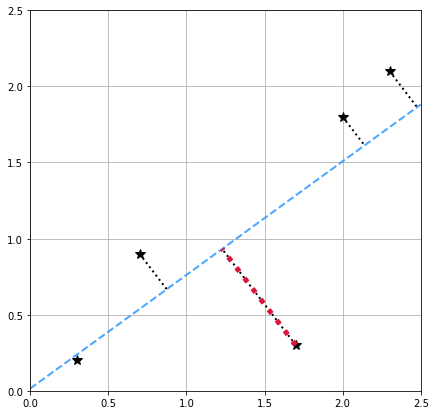

In [10]:
x = np.linspace(0,2.5, 100)
#fit for squared residuals
a,b = np.polyfit(X,Y,1)
plt.figure(figsize = (7,7))
plot_points_set_limits()

residuals = []
lines = []
for x, y in zip(X, Y):
    line, residual = plot_line_to_fit(x,y)
    plt.plot(line[0],line[1], c = 'black', ls = ':', lw = 2)
    lines.append(line)
    residuals.append(residual)
largest_r = residuals.index(max(residuals))
plt.plot(lines[largest_r][0], lines[largest_r][1], c = 'crimson', ls = ':', lw = 5 )

plt.show()

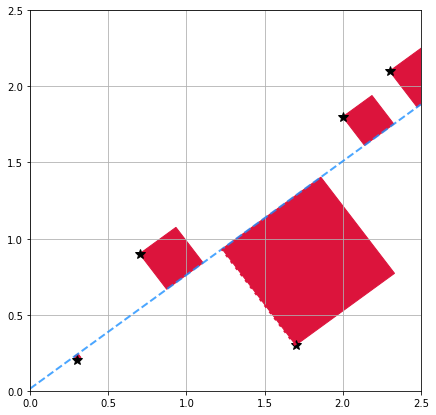

In [11]:
x = np.linspace(0,2.5, 100)
#fit for squared residuals
a,b = np.polyfit(X,Y,1)
fig, ax = plt.subplots(figsize = (7,7))
plot_points_set_limits()
residuals = []
lines = []
for x, y in zip(X, Y):
    line, residual = plot_line_to_fit(x,y)
    #plt.plot(line[0],line[1], c = 'black', ls = ':', lw = 2)
    lines.append(line)
    residuals.append(residual)
    p1 = [line[0][0], line[1][0]]
    p2 = [line[0][1], line[1][1]]
    def constraints(p3):
        one = np.sqrt((p2[0]- p3[0])**2 + (p2[1]- p3[1])**2) - residual
        two = p3[0]*a + b - p3[1]        
        return [one, two]

    p3 = opt.fsolve(constraints, [20,20])
    p4 = [p3[0] + p1[0]- p2[0], p3[1] + p1[1] - p2[1] ]
    patch = PathPatch(Path([p1,p2,p3,p4,p1], [Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO, Path.CLOSEPOLY]), 
              fc = 'crimson', edgecolor = 'crimson')
    ax.add_patch(patch)

plt.plot(lines[largest_r][0], lines[largest_r][1], c = 'crimson', ls = ':', lw = 3 )
plt.show()

In [12]:
import scipy.optimize as opt

line, residual = plot_line_to_fit(1,0)
p2 = [line[0][1], line[1][1]]
def constraints(p3):
    one = np.sqrt((p2[0]- p3[0])**2 + (p2[1]- p3[1])**2) - residual
    two = p3[0]*a + b - p3[1]        
    return [one, two]

p3 = opt.fsolve(constraints, [20,20])
p3


array([1.12386319, 0.85383029])

#### Monte Carlo (brute force) data reconciliation

0it [00:00, ?it/s]

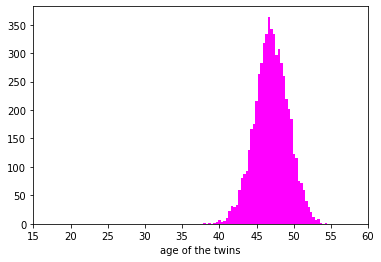

In [15]:
samplesize = 7*10**5
twin1 = sts.norm.rvs(loc = 50, scale = 2.5, size = samplesize)
twin2 = sts.norm.rvs(loc = 35, scale = 5, size = samplesize)

reconciled = []
for t1, t2 in tqdm(zip(twin1, twin2)):
    if abs(t1-t2) < 1:
        reconciled.append(t1)
        reconciled.append(t2)

plt.figure()
n, bins, patches = plt.hist(reconciled, color = 'fuchsia', bins = 'auto',)
plt.xlabel('age of the twins')
plt.xlim(15,60)
plt.show()


##### statistics of reconciled flow

In [16]:
print(f' the new mean value is {np.round(np.mean(reconciled),2)} with a standard deviation of {np.round(np.std(reconciled),2)}.')

 the new mean value is 47.0 with a standard deviation of 2.26.
